In [1]:
import numpy as np
import pandas as pd

In [2]:
data=pd.read_csv('zoo.csv')

In [3]:
data.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal_name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  class_type   101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [6]:
data.isna().sum()

animal_name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
class_type     0
dtype: int64

In [7]:
data['class_type'].unique()

array([1, 4, 2, 7, 6, 5, 3], dtype=int64)

In [10]:
data[data['class_type']==1].head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
5,buffalo,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1


In [11]:
features=data.drop(['animal_name','class_type'],axis=1)

In [12]:
features.shape

(101, 16)

In [13]:
# plot the dendrogram using the Ward method linkage technique
import matplotlib.pyplot as plt

In [14]:
import scipy.cluster.hierarchy as sch

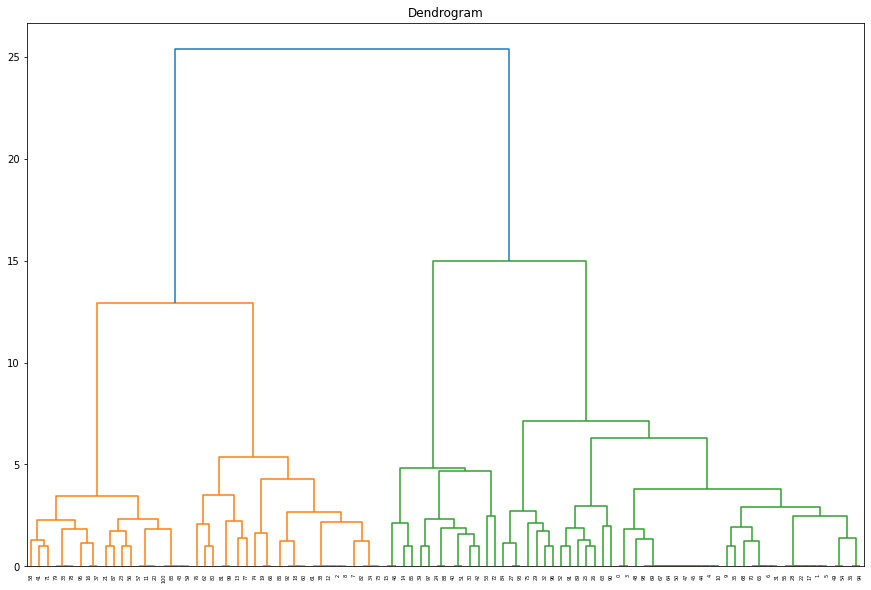

In [57]:
plt.figure(figsize=(15,10))
linkage_matrix=sch.ward(features)
sch.dendrogram(linkage_matrix)
plt.title('Dendrogram')
plt.show()

In [21]:
# linkage_matrix

In [33]:
# scale the data
from sklearn.preprocessing import StandardScaler

In [34]:
scaler=StandardScaler()

In [35]:
features_scaled=scaler.fit_transform(features)

In [36]:
# import the Agglomerative clustering algorithm
from sklearn.cluster import AgglomerativeClustering

In [49]:
# use 4 clusters to build the model
model=AgglomerativeClustering(n_clusters=7)

In [50]:
model.fit(features_scaled)

AgglomerativeClustering(n_clusters=7)

In [51]:
model.labels_

array([2, 2, 4, 2, 2, 2, 5, 4, 4, 5, 2, 3, 4, 0, 0, 0, 3, 2, 4, 6, 3, 3,
       2, 3, 0, 1, 1, 2, 2, 5, 0, 5, 2, 3, 4, 5, 2, 3, 4, 0, 0, 3, 0, 3,
       2, 2, 0, 2, 2, 2, 2, 0, 1, 0, 2, 2, 3, 3, 3, 3, 4, 4, 1, 2, 2, 5,
       6, 2, 5, 2, 5, 3, 0, 4, 6, 6, 1, 1, 3, 3, 1, 0, 4, 3, 2, 0, 1, 3,
       0, 1, 3, 1, 4, 2, 2, 3, 2, 0, 2, 0, 3], dtype=int64)

In [52]:
# assign each record to each of the clusters
data['Clusters']=model.labels_

In [58]:
data.head(10)

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type,Clusters
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1,2
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1,2
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1,2
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1,2
5,buffalo,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1,2
6,calf,1,0,0,1,0,0,0,1,1,1,0,0,4,1,1,1,1,5
7,carp,0,0,1,0,0,1,0,1,1,0,0,1,0,1,1,0,4,4
8,catfish,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4,4
9,cavy,1,0,0,1,0,0,0,1,1,1,0,0,4,0,1,0,1,5


In [56]:
# see records of cluster no. 3 (Birds Species)
data[data['Clusters']==3].head(10)

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type,Clusters
11,chicken,0,1,1,0,1,0,0,0,1,1,0,0,2,1,1,0,2,3
16,crow,0,1,1,0,1,0,1,0,1,1,0,0,2,1,0,0,2,3
20,dove,0,1,1,0,1,0,0,0,1,1,0,0,2,1,1,0,2,3
21,duck,0,1,1,0,1,1,0,0,1,1,0,0,2,1,0,0,2,3
23,flamingo,0,1,1,0,1,0,0,0,1,1,0,0,2,1,0,1,2,3
33,gull,0,1,1,0,1,1,1,0,1,1,0,0,2,1,0,0,2,3
37,hawk,0,1,1,0,1,0,1,0,1,1,0,0,2,1,0,0,2,3
41,kiwi,0,1,1,0,0,0,1,0,1,1,0,0,2,1,0,0,2,3
43,lark,0,1,1,0,1,0,0,0,1,1,0,0,2,1,0,0,2,3
56,ostrich,0,1,1,0,0,0,0,0,1,1,0,0,2,1,0,1,2,3


In [59]:
# see records of cluster no. 2 (fish Species)
data[data['Clusters']==2].head(10)

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type,Clusters
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1,2
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1,2
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1,2
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1,2
5,buffalo,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1,2
10,cheetah,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1,2
17,deer,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1,2
22,elephant,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1,2
27,fruitbat,1,0,0,1,1,0,0,1,1,1,0,0,2,1,0,0,1,2
28,giraffe,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1,2


In [47]:
# see records of cluster no. 0 (amphibians Species)
data[data['Clusters']==0].head(10)

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type,Clusters
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4,0
7,carp,0,0,1,0,0,1,0,1,1,0,0,1,0,1,1,0,4,0
8,catfish,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4,0
12,chub,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4,0
18,dogfish,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,1,4,0
25,frog,0,0,1,0,0,1,1,1,1,1,0,0,4,0,0,0,5,0
26,frog,0,0,1,0,0,1,1,1,1,1,1,0,4,0,0,0,5,0
34,haddock,0,0,1,0,0,1,0,1,1,0,0,1,0,1,0,0,4,0
38,herring,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4,0
52,newt,0,0,1,0,0,1,1,1,1,1,0,0,4,1,0,0,5,0


In [48]:
# see records of cluster no. 1 (animal Species)
data[data['Clusters']==1].head(10)

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type,Clusters
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1,1
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1,1
5,buffalo,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1,1
6,calf,1,0,0,1,0,0,0,1,1,1,0,0,4,1,1,1,1,1
9,cavy,1,0,0,1,0,0,0,1,1,1,0,0,4,0,1,0,1,1
10,cheetah,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1,1
17,deer,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1,1
19,dolphin,0,0,0,1,0,1,1,1,1,1,0,1,0,1,0,1,1,1


In [45]:
data.groupby(['Clusters']).sum()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
Clusters,,,,,,,,,,,,,,,,,
0,0,0,21,0,0,19,17,21,21,7,5,13,20,18,1,4,91
1,39,0,1,41,2,6,22,40,41,41,0,4,138,35,8,32,41
2,4,0,16,0,6,5,8,0,0,11,3,0,85,1,1,1,111
3,0,20,21,0,16,6,9,0,21,21,0,0,44,21,3,7,43
